In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# reflect an existing database into a new model

##create a new AutomapBase clas susing automap_base()
base = automap_base()
##create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Collect the names of tables within the database
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Using the inspector to print the column names within the 'measurment' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Use `engine.execute` to select and display first 1000 rows from the Measurment table
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [13]:
# Query measurment for `date`, `prcp` and save the query into results
measurement_prcp_results = session.query(Measurement.station,Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()

measurement_prcp_results

[('USC00519397', '2017-08-23', 0.0),
 ('USC00514830', '2017-08-23', 0.0),
 ('USC00519523', '2017-08-23', 0.08),
 ('USC00516128', '2017-08-23', 0.45),
 ('USC00519397', '2017-08-22', 0.0),
 ('USC00519523', '2017-08-22', 0.0),
 ('USC00516128', '2017-08-22', 0.5),
 ('USC00519397', '2017-08-21', 0.0),
 ('USC00514830', '2017-08-21', 0.02),
 ('USC00519523', '2017-08-21', None),
 ('USC00516128', '2017-08-21', 0.56),
 ('USC00519397', '2017-08-20', 0.0),
 ('USC00514830', '2017-08-20', 0.01),
 ('USC00516128', '2017-08-20', None),
 ('USC00519397', '2017-08-19', 0.0),
 ('USC00514830', '2017-08-19', 0.0),
 ('USC00519523', '2017-08-19', None),
 ('USC00516128', '2017-08-19', 0.09),
 ('USC00519397', '2017-08-18', 0.0),
 ('USC00514830', '2017-08-18', 0.0),
 ('USC00519281', '2017-08-18', 0.06),
 ('USC00516128', '2017-08-18', None),
 ('USC00514830', '2017-08-17', 0.0),
 ('USC00519523', '2017-08-17', 0.05),
 ('USC00519281', '2017-08-17', 0.01),
 ('USC00516128', '2017-08-17', 0.13),
 ('USC00514830', '2017-0

In [14]:
# Load the results into a pandas dataframe.
measurement_prcp_df = pd.DataFrame(measurement_prcp_results, columns=['station','date', 'prcp'])

measurement_prcp_df.set_index('date', inplace=True)

#measurement_prcp_df.count()
measurement_prcp_df

,station,prcp
date,,
2017-08-23,USC00519397,0.00
2017-08-23,USC00514830,0.00
2017-08-23,USC00519523,0.08
2017-08-23,USC00516128,0.45
2017-08-22,USC00519397,0.00
...,...,...
2010-01-01,USC00518838,0.21
2010-01-01,USC00519523,0.15
2010-01-01,USC00519281,0.15


In [15]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
# Use `engine.execute` to select and display all rows from the Station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import extract
## Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [21]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query to Date: ", query_date)

Query to Date:  2016-08-23


In [22]:
# Perform a query to retrieve the data and precipitation scores
last_12months_results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()
last_12months_results

[('2016-08-24', 'USC00519397', 0.08),
 ('2016-08-24', 'USC00513117', 2.15),
 ('2016-08-24', 'USC00514830', 2.28),
 ('2016-08-24', 'USC00517948', None),
 ('2016-08-24', 'USC00519523', 1.22),
 ('2016-08-24', 'USC00519281', 2.15),
 ('2016-08-24', 'USC00516128', 1.45),
 ('2016-08-25', 'USC00519397', 0.08),
 ('2016-08-25', 'USC00513117', 0.08),
 ('2016-08-25', 'USC00514830', 0.0),
 ('2016-08-25', 'USC00517948', 0.0),
 ('2016-08-25', 'USC00519523', 0.21),
 ('2016-08-25', 'USC00519281', 0.06),
 ('2016-08-25', 'USC00516128', 0.11),
 ('2016-08-26', 'USC00519397', 0.0),
 ('2016-08-26', 'USC00513117', 0.03),
 ('2016-08-26', 'USC00514830', 0.02),
 ('2016-08-26', 'USC00517948', 0.04),
 ('2016-08-26', 'USC00519523', 0.0),
 ('2016-08-26', 'USC00519281', 0.01),
 ('2016-08-27', 'USC00519397', 0.0),
 ('2016-08-27', 'USC00513117', 0.18),
 ('2016-08-27', 'USC00514830', 0.02),
 ('2016-08-27', 'USC00519523', 0.0),
 ('2016-08-27', 'USC00519281', 0.12),
 ('2016-08-27', 'USC00516128', None),
 ('2016-08-28', 'U

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12months_df = pd.DataFrame(last_12months_results, columns=['date','station', 'prcp'])

last_12months_df.set_index('date', inplace=True)

last_12months_df

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00513117,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00517948,NaN
2016-08-24,USC00519523,1.22
...,...,...
2017-08-22,USC00516128,0.50
2017-08-23,USC00519397,0.00
2017-08-23,USC00514830,0.00


In [24]:
# Sort the dataframe by date
last_12months_df=last_12months_df.sort_index()
last_12months_df

,station,prcp
date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00513117,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00517948,NaN
2016-08-24,USC00519523,1.22
...,...,...
2017-08-22,USC00516128,0.50
2017-08-23,USC00519397,0.00
2017-08-23,USC00514830,0.00


Text(18.185000000000002, 0.5, 'Inch')

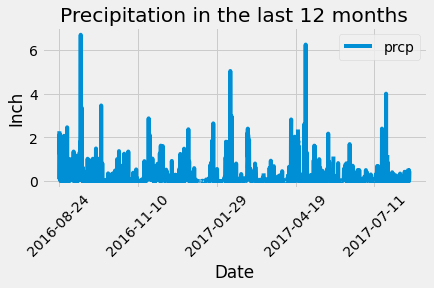

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12months_df.plot(x_compat=True) 
plt.xticks(rotation='45')
plt.tight_layout()
plt.title("Precipitation in the last 12 months")

plt.xlabel("Date")
plt.ylabel("Inch")

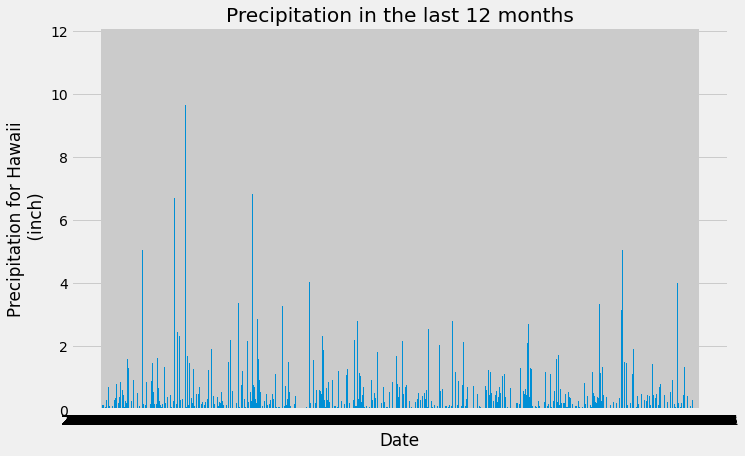

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data
### Define plot space
fig, ax = plt.subplots(figsize=(10, 6))
###Define x and y axes
x_value = measurement_prcp_df.index
y_value = measurement_prcp_df.prcp
ax.bar(x_value, y_value)
#plt.xticks(rotation='45')
plt.tight_layout()
plt.title("Precipitation in the last 12 months")

plt.xlabel("Date")
plt.ylabel("Precipitation for Hawaii\n (inch)")


plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_prcp_df.describe()


In [ ]:
last_12months_measurement_prcp_df.describe()

In [ ]:
# Design a query to show how many stations are available in this dataset?
#engine.execute('SELECT * FROM station').fetchall()
number_stations = session.query(func.count(Station.station)).all()
print( "Numbers of stations : ", number_stations)

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
